## Part 1: Introduction to OpenAI Gym
The [gym](https://gym.openai.com/) library developed by OpenAI is a collection of test problems — **environments** — that you can use to test your reinforcement learning algorithms.

## Set up OpenAI Gym

### Installation
To get started, simply type pip install gym in the terminal (Anaconda prompt in Windows):
```
pip install gym
```
**Warning**: To install the gym library, you will need to have Python3.5 or above. 
Then install the libraries required:
```
pip install pyglet
pip install pyopengl
pip install pyvirtualdisplay
```

## Available environments 
Environments available in the gym include classic control, Atari and 2D and 3D robots tasks, from easy to difficult level.  

### Classic control 

Classic control problems from RL literature.  

#### CartPole

A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The actions one could take are pushing the cart to the left or right. The goal is to prevent the pendulum from falling over.  A reward of +1 is given for every step that the pendulum remains upright. 

In [1]:
from IPython.display import Video

Video('./graphs/Cart-Pole.mp4')

#### Mountain Car

A car is stuck in a valley. The goal is to drive up the mountain and reach where the flat is.  However, the car's engine is not strong enough climb to the top in a single run. The way to succeed is to drive back and forth to build up momentum.  The actions in the problem is also driving the car to the left or right.  A reward of -1 is given for every step until reaching the goal.

In [2]:
Video('./graphs/mountain_car.mp4')

#### Acrobot

The acrobot system includes two joints and two links, where the joint between the two links is actuated. Initially, the links are hanging downwards, and the goal is to swing the end of the lower link up to a given height.

In [3]:
Video('./graphs/acrobot.mp4')

### Atari
Teach the agent to learn to play Atari games

#### Pac-Man

In [4]:
Video('./graphs/atari1.mp4')

#### Boxing

In [5]:
Video('./graphs/boxing.mp4', width=250)

### MuJoCo
Continuous control tasks, running in a fast physics simulator.

#### Ant v2
Make a four-legged creature walk as fast as possible.

In [6]:
Video('./graphs/ant_v2.mp4', width=450)

#### Humanoid-v2

Make a three-dimensional bipedal robot walk forward as fast as possible. [This link](https://youtu.be/07eIebEk1MM) gives you an idea about the goal we try to achieve.

In [7]:
Video('./graphs/Learning_to_walk.mp4', width=450)

### Robotics
Simulated goal-based tasks for the Fetch robot.

#### FetchPush-v0

A goal is randomly chosen in 3D space. Control Fetch's end effector to grasp and lift the block up to reach that goal.

In [8]:
Video('./graphs/fetch_pick_place.mp4')

### Gym Retro
Newly released platform for RL research on games. 

In [9]:
Video('./graphs/ferrari.mp4')

In [10]:
Video('./graphs/gradius3.mp4')

In [11]:
Video('./graphs/multi_games.mp4')

To check the list of environments available in your installation, 

In [12]:
from gym import envs 
print(envs.registry.all())

dict_values([EnvSpec(ALE/Tetris-v5), EnvSpec(ALE/Tetris-ram-v5), EnvSpec(Adventure-v0), EnvSpec(AdventureDeterministic-v0), EnvSpec(AdventureNoFrameskip-v0), EnvSpec(Adventure-v4), EnvSpec(AdventureDeterministic-v4), EnvSpec(AdventureNoFrameskip-v4), EnvSpec(Adventure-ram-v0), EnvSpec(Adventure-ramDeterministic-v0), EnvSpec(Adventure-ramNoFrameskip-v0), EnvSpec(Adventure-ram-v4), EnvSpec(Adventure-ramDeterministic-v4), EnvSpec(Adventure-ramNoFrameskip-v4), EnvSpec(AirRaid-v0), EnvSpec(AirRaidDeterministic-v0), EnvSpec(AirRaidNoFrameskip-v0), EnvSpec(AirRaid-v4), EnvSpec(AirRaidDeterministic-v4), EnvSpec(AirRaidNoFrameskip-v4), EnvSpec(AirRaid-ram-v0), EnvSpec(AirRaid-ramDeterministic-v0), EnvSpec(AirRaid-ramNoFrameskip-v0), EnvSpec(AirRaid-ram-v4), EnvSpec(AirRaid-ramDeterministic-v4), EnvSpec(AirRaid-ramNoFrameskip-v4), EnvSpec(Alien-v0), EnvSpec(AlienDeterministic-v0), EnvSpec(AlienNoFrameskip-v0), EnvSpec(Alien-v4), EnvSpec(AlienDeterministic-v4), EnvSpec(AlienNoFrameskip-v4), EnvSp

Notice that 

`pip install gym`

does not install all gym dependencies. You can install these dependencies for one family like

`pip install gym\[atari\]`

or use

`pip install gym\[all\]`

to install all dependencies.

## Cart-pole balancing

### Task
A pole is attached by an un-actuated joint to a cart which moves along a frictionless track.  The task is to apply forces to the cart along the track, and the goal is to prevent it from falling over by increasing and reducing the cart's velocity.

### Action
Two discrete actions: a=0 indicates pushing cart to the left and a=1 pushes the cart to the right.  The amount the velocity reduced or increased does not only depends on the direction you are moving but also on the angle the pole is pointing. 

### Reward
 Reward is +1 for every step taken, including the termination step.

### Observation
There are 4 observations returned by the environment after each action taken by an agent:
- Cart position:  a number between `-4.8` and `4.8`
- Cart velocity: a number between `-inf`and `inf`
- Pole angle: an angle between -24&deg; and 24&deg; 
-  Pole velocity at tip: a number between `-inf`and `inf`

### Termination
- Cart position is smaller or greater than `-2.4` or `2.4`
- Pole Angle is smaller or greater than -12&deg; or 12&deg;
- Episode length is longer than 200

### Solved requirements
The problem is considered solved when the average reward is greater than or equal to 195.0 over 100 consecutive trials.

## Basics in Gym

### Import an environment
To start with, let's choose the cart-pole environment. The following command returns the environment passed as argument.
```
gym.make('environment_id')
```
Every environment comes with an `action_space` and an `observation_space`. For example,

In [1]:
import gym

env = gym.make('CartPole-v0')
print(env.action_space)
print(env.observation_space)

Discrete(2)
Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


Action space shows the number of actions one can take and observation space. In this case, the actions include `left` and `right`. The third output in `Box` indicates that you have 4 state variables: cart position, cart velocity, pole angle and pole position. The first two outputs gives the lower and upper bounds of the 4 states. The last output shows the data type of the states. When angle value lies outside `(-0.209, 0.209)` (computed by <img src="https://latex.codecogs.com/svg.latex?\Large&space;±12*2*\pi/360" title="a"/>), you will fail the episode.

### Start the process
Start the process by calling `env.reset()`.  This function creates a new environment and returns an initial observation. 

`env.render()` displays a popup window that renders an update for each step in the loop.

### The gym `Step` function
The environment's `step` function takes an action at each time step.  The action is passed as an argument to the function.  `step` function returns four values, namely `observation`, `reward`, `done` and `info`. 

`observation`:  an environment-specific object representing your observation of the environment.

`reward`: amount of reward achieved by the previous action.

`done`: a boolean value. When it's true, it indicates the episode has terminated and the environment needs to be reset. 

`info`:  diagnostic information useful for debugging.

### Taking a random action
`env.action_space.sample()` takes a random action. 

## Get something running
Let's try to run the `CartPole-v0` environment for 100 timesteps taking random actions. We will need to import `pyglet`. Try `pip install pyglet`

In [1]:
import gym  
  
env = gym.make("CartPole-v0")  
env.reset()  
  
for _ in range(100):  
    env.render()  
    env.step(env.action_space.sample())  
  
env.close()

/Users/shic6/opt/anaconda3/lib/python3.9/site-packages/gym/envs/classic_control/cartpole.py:150: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  logger.warn(


You should see a window pop up rendering the Cart-pole problem.

Alternatively, we can record the frames.

/Users/shic6/opt/anaconda3/lib/python3.9/site-packages/gym/envs/classic_control/cartpole.py:150: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  logger.warn(


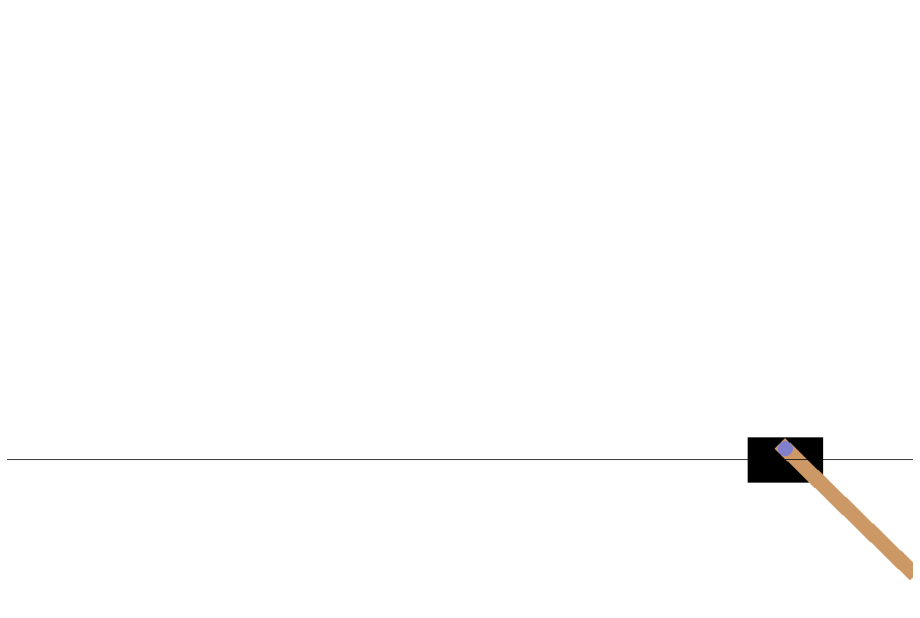

In [15]:
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import HTML

env = gym.make('CartPole-v0')
env.reset()

frames = []
for i in range(100):
    frames.append(env.render(mode = 'rgb_array'))
    env.step(env.action_space.sample())

plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
patch = plt.imshow(frames[0])
plt.axis('off')
animate = lambda i: patch.set_data(frames[i])
ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval = 50)
HTML(ani.to_jshtml())

## Run episodes

Run 10 episodes with random actions,

In [16]:
episodes = 10
for i in range(episodes):
  env.reset()
  done = False
  rewards = 0
  while not done and rewards < 200:
    frames.append(env.render(mode = 'rgb_array'))
    obs, r, done, info = env.step(env.action_space.sample())
    rewards += r
  print('Episode:', i, 'Rewards:', rewards)
  print('Observations:', obs)

Episode: 0 Rewards: 19.0
Observations: [-0.08593975 -0.599141    0.22349411  1.3540233 ]
Episode: 1 Rewards: 34.0
Observations: [ 0.18525289 -0.37113705 -0.21064763  0.09264991]
Episode: 2 Rewards: 15.0
Observations: [-0.12213078 -0.55723256  0.22750898  1.2282991 ]
Episode: 3 Rewards: 43.0
Observations: [-0.26611614 -0.45227933 -0.21809135 -1.0187337 ]
Episode: 4 Rewards: 13.0
Observations: [-0.10680015 -1.0305616   0.23205462  1.8122833 ]
Episode: 5 Rewards: 13.0
Observations: [ 0.08963609  1.0295438  -0.22141024 -1.8081921 ]
Episode: 6 Rewards: 17.0
Observations: [ 0.18205376  0.9920753  -0.226665   -1.6072152 ]
Episode: 7 Rewards: 28.0
Observations: [-0.02708813 -0.80725116  0.22158581  1.9833887 ]
Episode: 8 Rewards: 24.0
Observations: [-0.16811287 -0.3771448   0.22250746  0.932546  ]
Episode: 9 Rewards: 20.0
Observations: [-0.10821535 -0.776699    0.20951298  1.4747329 ]


The third variable in the observations corresponds to angles which seemed to be the reason why the episodes failed. Therefore, we design a naive improvement on the previous algorithm. Instead of choosing random actions. we take actions based on the pole angles, i.e., when the angle is negative, we push the cart to the left, otherwise to the right.



In [2]:
def action(angle):
    if angle < 0:
        return 0
    else:
        return 1

And modify the execution part:

In [3]:
import gym
env = gym.make('CartPole-v0')
env.reset()
episodes = 10
for i in range(episodes):
  obs = env.reset()
  done = False
  rewards = 0.0
  while not done and rewards < 200:
    env.render(mode = 'rgb_array')
    a = action(obs[2])
    obs, r, done, info = env.step(a)
    rewards += r
  print('Episode:', i, 'Rewards:', rewards)
  print('Observations:', obs)

Episode: 0 Rewards: 39.0
Observations: [ 0.20462075  0.9469082  -0.22865595 -1.2012128 ]
Episode: 1 Rewards: 40.0
Observations: [-0.3216087  -0.81682765  0.23122472  0.89892614]
Episode: 2 Rewards: 31.0
Observations: [-0.16811877 -0.21172076  0.22105597  0.3762023 ]
Episode: 3 Rewards: 40.0
Observations: [ 0.3024763   1.1659139  -0.23588455 -1.2986319 ]
Episode: 4 Rewards: 40.0
Observations: [ 0.28882208  1.1488974  -0.21683125 -1.2190083 ]
Episode: 5 Rewards: 37.0
Observations: [ 0.18273531  0.950836   -0.21073155 -1.1379964 ]
Episode: 6 Rewards: 52.0
Observations: [-0.00649823 -1.1374454   0.21233173  1.56902   ]
Episode: 7 Rewards: 46.0
Observations: [ 0.27088916  1.1689969  -0.2274571  -1.2617759 ]
Episode: 8 Rewards: 34.0
Observations: [-0.16373326 -0.78814095  0.21097845  1.0237815 ]
Episode: 9 Rewards: 51.0
Observations: [-0.139098   -0.56022596  0.21334     0.7986078 ]
